This notebook is used to extract features from the following audio files:
- i
- a
- u
- phrase

In [2]:
from IPython import display
from pathlib import Path
from glob import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
def display_wave(file):
    data, sr = librosa.load(file)
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(data, sr)
    return data, sr

# Orgnize files

(array([-0.03387975, -0.05200224, -0.0501773 , ...,  0.11598858,
         0.1242796 ,  0.        ], dtype=float32), 22050)

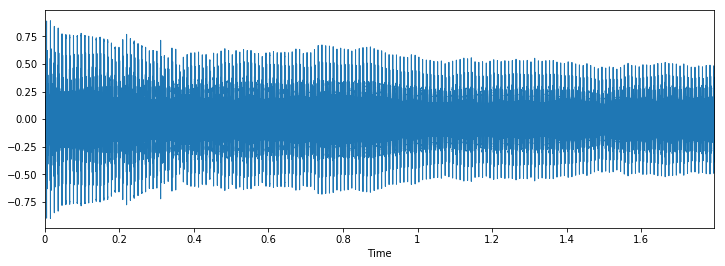

In [125]:
display_wave(test_files.a['h'][7])

In [4]:
DATA_PATH = 'german_voice_database/'

In [84]:
# 'Dysarthrophonia'
pathology_names = ['Cordectomy', 'Dysodie', 'Dysphonia', 'Hyperfunctional_dysphonia',
                   'Hypofunctional_dysphonia', 'Hypotonic_dysphonia', 'Laryngitis', 'Polyp', 'Reinke_edema',
                   'Spasmodic_dysphonia', 'VC_carcinoma', 'VFP']
audio_contents = ['i', 'a', 'u', 'phrase']
pitchs = ['h', 'l', 'n', 'lhl']

In [19]:
class audio_data:
    def __init__(self, name=''):
        self.name = name
        self.i = {}
        self.a = {}
        self.u = {}
        self.phrase = []

In [30]:
def get_files(pathology_name, audio_content, pitch=None):
    if audio_content=='phrase':
        files = glob(DATA_PATH+pathology_name+'/'+audio_content+'/'+'*-phrase.wav')
    elif pitch==None:
        print('Please input pitch type!!!')
        return
    else:
        files = glob(DATA_PATH+pathology_name+'/'+audio_content+'/'+'*-{}_{}.wav'.format(audio_content,pitch))
    return sorted(files)

In [42]:
def get_healty_id():
    h_phrase = get_files('Healthy','phrase')
    id = []
    for f in h_phrase:
        id.append(f[f.find('\\')+1:f.find('-')])
    return id

In [43]:
healthy_ids = get_healty_id()

In [54]:
def prune_healty_files(healthy_ids, all_files):
    files = all_files[:]
    for file in all_files:
        id = file[file.find('\\')+1:file.find('-')]
        if id not in healthy_ids:
            files.remove(file)
    return files

In [55]:
healthy_files = audio_data('healthy')

In [56]:
healthy_files.phrase = h_phrase

In [59]:
for p in pitchs:
    i_files = get_files('Healthy','i',p)
    a_files = get_files('Healthy','a',p)
    u_files = get_files('Healthy','u',p)
    i_files = prune_healty_files(healthy_ids,i_files)
    a_files = prune_healty_files(healthy_ids,a_files)
    u_files = prune_healty_files(healthy_ids,u_files)
    healthy_files.i[p] = i_files
    healthy_files.a[p] = a_files
    healthy_files.u[p] = u_files
    print(len(i_files),len(a_files),len(u_files))

634 634 634
634 634 634
634 634 634
634 634 634


In [62]:
with open('healthy_file_names.pkl','wb') as f:
    pickle.dump(healthy_files, f)

In [86]:
def check_file_completeness():
    for p in pathology_names:
        ifiles = glob(DATA_PATH+p+'/'+'i'+'/'+'*.wav')
        afiles = glob(DATA_PATH+p+'/'+'a'+'/'+'*.wav')
        ufiles = glob(DATA_PATH+p+'/'+'u'+'/'+'*.wav')
        pfiles = glob(DATA_PATH+p+'/'+'phrase'+'/'+'*.wav')
        if len(ifiles)==len(afiles)==len(ufiles)==len(pfiles)*4:
            print(p, len(pfiles))
        else:
            pass
#             print('************************')
#             print('Files have number issue!')
#             print(p,len(ifiles),len(afiles),len(ufiles),len(pfiles))
#             print('************************')
    return

In [79]:
from collections import Counter
def check_specific_file(p_name):
    ifiles = glob(DATA_PATH+p_name+'/'+'i'+'/'+'*.wav')    
    afiles = glob(DATA_PATH+p_name+'/'+'a'+'/'+'*.wav')    
    ufiles = glob(DATA_PATH+p_name+'/'+'u'+'/'+'*.wav')    
    pfiles = glob(DATA_PATH+p_name+'/'+'phrase'+'/'+'*.wav')    
    if not (len(ifiles)==len(afiles)==len(ufiles)==len(pfiles)*4):
        iids = [f[f.find('\\')+1:f.find('-')] for f in ifiles]
        aids = [f[f.find('\\')+1:f.find('-')] for f in afiles]
        uids = [f[f.find('\\')+1:f.find('-')] for f in ufiles]
        pids = [f[f.find('\\')+1:f.find('-')] for f in pfiles]
        ids = list(set(iids + aids + uids + pids))
        print(p_name,':')
        print('i missing: {}'.format(Counter(ids*4)-Counter(iids)))
        print('a missing: {}'.format(Counter(ids*4)-Counter(aids)))
        print('u missing: {}'.format(Counter(ids*4)-Counter(uids)))
        print('p missing: {}'.format(Counter(ids)-Counter(pids)))

- Files have number issue!
Dysarthrophonia 224 224 224 19
- Files have number issue!
Hyperfunctional_dysphonia 851 852 852 212 (fixed)
- Files have number issue!
VFP 849 849 849 213 (fixed)

In [66]:
check_file_completeness()

Files have number issue!
Dysarthrophonia 224 224 224 19
Files have number issue!
Hyperfunctional_dysphonia 851 852 852 212
Files have number issue!
VFP 849 849 849 213


In [82]:
check_specific_file('Hyperfunctional_dysphonia')

In [83]:
check_specific_file('VFP')

In [87]:
check_file_completeness()

Cordectomy 59
Dysodie 56
Dysphonia 101
Hyperfunctional_dysphonia 211
Hypofunctional_dysphonia 16
Hypotonic_dysphonia 5
Laryngitis 140
Polyp 45
Reinke_edema 68
Spasmodic_dysphonia 64
VC_carcinoma 22
VFP 211


_Healthy sample size: 634_

In [88]:
for p in pathology_names:
    check_specific_file(p)

In [89]:
check_specific_file('Healthy')

Healthy :
i missing: Counter()
a missing: Counter()
u missing: Counter()
p missing: Counter({'2202': 1, '2039': 1, '2169': 1, '2200': 1, '2047': 1, '2036': 1, '2168': 1, '2162': 1, '2172': 1, '2171': 1, '2043': 1, '2163': 1, '1996': 1, '2046': 1, '2197': 1, '2195': 1, '2179': 1, '1925': 1, '2164': 1, '2178': 1, '2054': 1, '2175': 1, '1995': 1, '1947': 1, '2048': 1, '2038': 1, '2180': 1, '2051': 1, '2174': 1, '2050': 1, '2037': 1, '2042': 1, '2181': 1, '2041': 1, '2173': 1, '2018': 1, '2044': 1, '2166': 1, '2176': 1, '1926': 1, '2052': 1, '2201': 1, '2045': 1, '2165': 1, '2053': 1, '2167': 1, '2196': 1, '2199': 1, '2177': 1, '2040': 1, '2170': 1, '2198': 1, '2049': 1})


In [102]:
for p_name in pathology_names:
    pathology_files = audio_data(p_name)
    p_files = get_files(p_name,'phrase')
    pathology_files.phrase = p_files
    for p in pitchs:
        i_files = get_files(p_name,'i',p)
        a_files = get_files(p_name,'a',p)
        u_files = get_files(p_name,'u',p)
        pathology_files.i[p] = i_files
        pathology_files.a[p] = a_files
        pathology_files.u[p] = u_files
    with open('{}_file_names.pkl'.format(p_name), 'wb') as f:
        pickle.dump(pathology_files,f)

# Extract features

In [91]:
pathology_names = ['Cordectomy', 'Dysodie', 'Dysphonia', 'Hyperfunctional_dysphonia',
                   'Hypofunctional_dysphonia', 'Hypotonic_dysphonia', 'Laryngitis', 'Polyp', 'Reinke_edema',
                   'Spasmodic_dysphonia', 'VC_carcinoma', 'VFP']
audio_contents = ['i', 'a', 'u', 'phrase']
pitchs = ['h', 'l', 'n', 'lhl']

In [115]:
class AudioFeature:
    def __init__(self, audio_files, n_mfcc=20):
        self.name = audio_files.name
        self.phrase = audio_files.phrase
        self.sample_size = len(audio_files.phrase)
        self.i = audio_files.i
        self.a = audio_files.a
        self.u = audio_files.u
        self.n_mfcc = n_mfcc
        self.p_mfcc = []
        self.iau_mfcc = []
        self.labels = []
        self.extract_mfcc_features(self.n_mfcc)
        self.create_labels()
        
    def extract_mfcc_features(self, n_mfcc):
        for p_file in self.phrase:
            mfccs = self.extract_mfcc(p_file, n_mfcc)
            self.p_mfcc.append(mfccs)
        for i in range(self.sample_size):
            mfcc_vector = np.array([])
            for content in (self.i, self.a, self.u):
                for pitch in pitchs:
                    mfccs = self.extract_mfcc(content[pitch][i], n_mfcc)
                    mfcc_vector = np.hstack((mfcc_vector,mfccs))
            self.iau_mfcc.append(mfcc_vector)
        self.p_mfcc = np.array(self.p_mfcc)
        self.iau_mfcc = np.array(self.iau_mfcc)
        
    def create_labels(self):
        self.labels = np.array([self.name]*self.sample_size)
            
    def extract_mfcc(self, file, n_mfcc):
        data, sr = librosa.load(file)
        mfccs = librosa.feature.mfcc(data, sr, n_mfcc=n_mfcc)
        return np.mean(mfccs.T, axis=0)

In [130]:
n_mfccs = (24, 36)
for n_mfcc in n_mfccs:
    with open('healthy_file_names.pkl','rb') as f:
        h_files = pickle.load(f)
    af = AudioFeature(h_files, n_mfcc)
    with open('mfcc_{n_mfcc}/{name}_mfcc_{n_mfcc}.pkl'.format(name='healthy',n_mfcc=n_mfcc), 'wb') as f:
        pickle.dump(af, f)

In [128]:
n_mfccs = (12, 24, 36)
for n_mfcc in n_mfccs:
    for p_name in pathology_names:
        with open('{}_file_names.pkl'.format(p_name), 'rb') as f:
            files = pickle.load(f)
        af = AudioFeature(files, n_mfcc)
        with open('mfcc_{n_mfcc}/{name}_mfcc_{n_mfcc}.pkl'.format(name=p_name,n_mfcc=n_mfcc), 'wb') as f:
            pickle.dump(af, f)

In [61]:
def calculate_mfcc_features(h_file, d_file, l_file):
    h_mfcc = []
    for f in h_file:
        mfcc = extract_mfcc(f)
        h_mfcc.append(mfcc)
    h_mfcc = np.array(h_mfcc)

    d_mfcc = []
    for f in d_file:
        mfcc = extract_mfcc(f)
        d_mfcc.append(mfcc)
    d_mfcc = np.array(d_mfcc)

    l_mfcc = []
    for f in l_file:
        mfcc = extract_mfcc(f)
        l_mfcc.append(mfcc)
    l_mfcc = np.array(l_mfcc)
    return h_mfcc, d_mfcc, l_mfcc

In [17]:
h_label = np.array(['healthy']*80)
d_label = np.array(['dysphonia']*110)
l_label = np.array(['laryngitis']*110)

In [20]:
h_label.shape

(80,)

In [21]:
iau_mfcc = np.concatenate((h_iau_mfcc, d_iau_mfcc, l_iau_mfcc))
iau_label = np.concatenate((h_label, d_label, l_label))

In [22]:
iau_mfcc.shape,iau_label.shape

((300, 20), (300,))

In [49]:
h_phrase_mfcc = []
for f in h_phrase:
    mfcc = extract_mfcc(f)
    h_phrase_mfcc.append(mfcc)
h_phrase_mfcc = np.array(h_phrase_mfcc)

d_phrase_mfcc = []
for f in d_phrase:
    mfcc = extract_mfcc(f)
    d_phrase_mfcc.append(mfcc)
d_phrase_mfcc = np.array(d_phrase_mfcc)

l_phrase_mfcc = []
for f in l_phrase:
    mfcc = extract_mfcc(f)
    l_phrase_mfcc.append(mfcc)
l_phrase_mfcc = np.array(l_phrase_mfcc)

In [51]:
h_label = np.array(['healthy']*79)
d_label = np.array(['dysphonia']*110)
l_label = np.array(['laryngitis']*110)

In [53]:
phrase_mfcc = np.concatenate((h_phrase_mfcc, d_phrase_mfcc, l_phrase_mfcc))
phrase_label = np.concatenate((h_label, d_label, l_label))

In [15]:
test_file = DATA_PATH+'Healthy/phrase/10-phrase.wav'

(array([-0.01299499, -0.0206047 , -0.01633609, ..., -0.44200617,
        -0.4321895 ,  0.        ], dtype=float32), 22050)

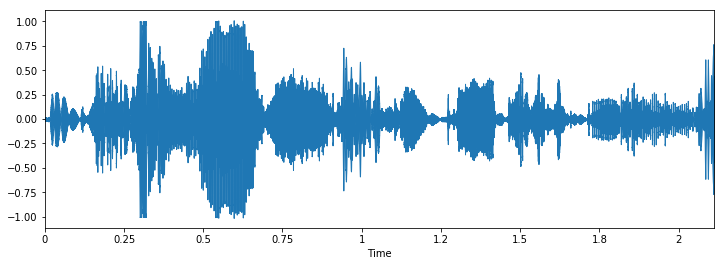

In [16]:
display_wave(test_file)

In [17]:
data, sr = librosa.load(test_file)

In [18]:
mfcc = librosa.feature.mfcc(data, sr)

In [19]:
mfcc.shape

(20, 92)

In [20]:
data.shape

(46593,)

In [21]:
44903/sr/88

0.02314110492681921